In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("insurance.xlsx")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.shape

(1338, 7)

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.values

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

#### Univariate - Non Visual Statistical Analysis

In [12]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [13]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [14]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [15]:
discrete_univariate_analysis(discrete_df)

********** sex **********
count                1338
nunique                 2
unique     [female, male]
Name: sex, dtype: object
Value Counts: 
 sex
male      676
female    662
Name: count, dtype: int64

********** smoker **********
count           1338
nunique            2
unique     [yes, no]
Name: smoker, dtype: object
Value Counts: 
 smoker
no     1064
yes     274
Name: count, dtype: int64

********** region **********
count                                              1338
nunique                                               4
unique     [southwest, southeast, northwest, northeast]
Name: region, dtype: object
Value Counts: 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [16]:
numerical_univariate_analysis(numerical_df)

********** age **********
count     1338.000000
min         18.000000
max         64.000000
mean        39.207025
median      39.000000
std         14.049960
skew         0.055673
Name: age, dtype: float64

********** bmi **********
count     1338.000000
min         15.960000
max         53.130000
mean        30.663397
median      30.400000
std          6.098187
skew         0.284047
Name: bmi, dtype: float64

********** children **********
count     1338.000000
min          0.000000
max          5.000000
mean         1.094918
median       1.000000
std          1.205493
skew         0.938380
Name: children, dtype: float64

********** charges **********
count      1338.000000
min        1121.873900
max       63770.428010
mean      13270.422265
median     9382.033000
std       12110.011237
skew          1.515880
Name: charges, dtype: float64



### Bivariate - Non Visual Statistical Analysis

In [17]:
# num vs num

numerical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [18]:
# cat vs cat

pd.crosstab(discrete_df['sex'], discrete_df['smoker'], normalize='index')

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


In [20]:
# num vs cat

g = df.groupby('sex')

g['charges'].agg(['min', 'max', 'mean'])

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


### Univariate Plotting For Numerical Columns - Histogram, KDE, CDF and Box Plot

<Axes: xlabel='charges', ylabel='Count'>

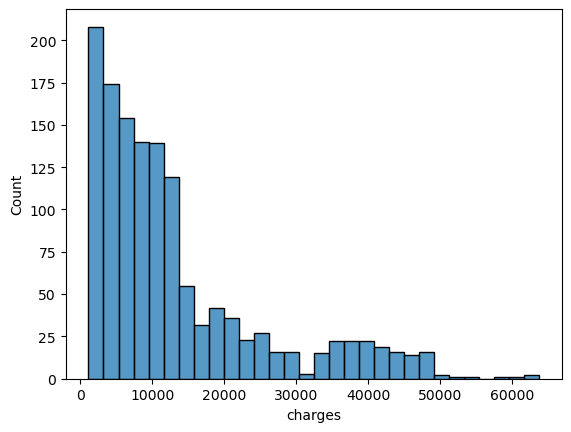

In [21]:
sns.histplot(data=df, x="charges")

<Axes: xlabel='charges'>

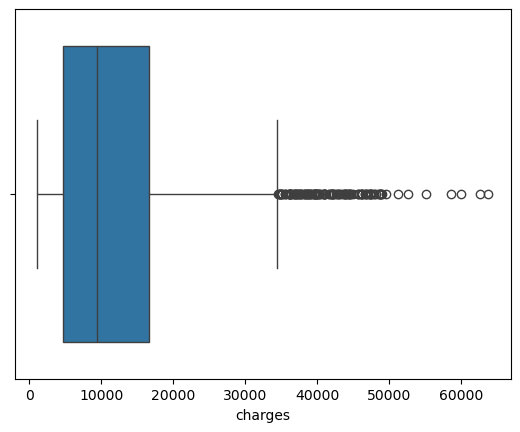

In [22]:
sns.boxplot(data=df, x="charges")

<Axes: xlabel='charges', ylabel='Density'>

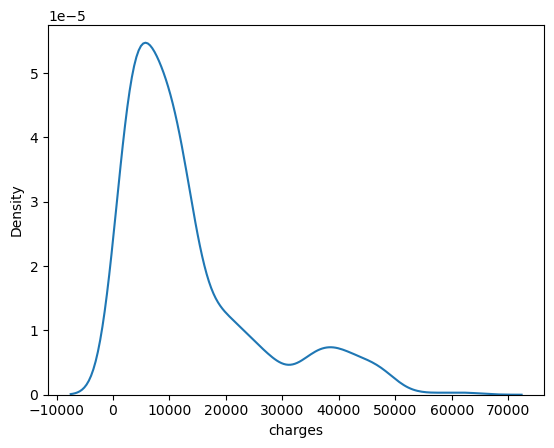

In [24]:
sns.kdeplot(data=df, x="charges")

<Axes: xlabel='charges', ylabel='Proportion'>

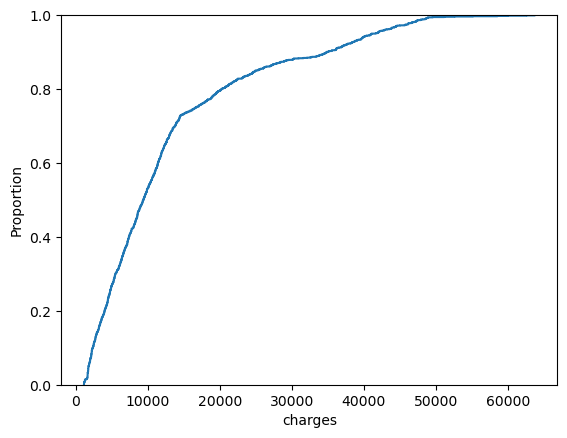

In [25]:
sns.ecdfplot(data=df, x="charges")

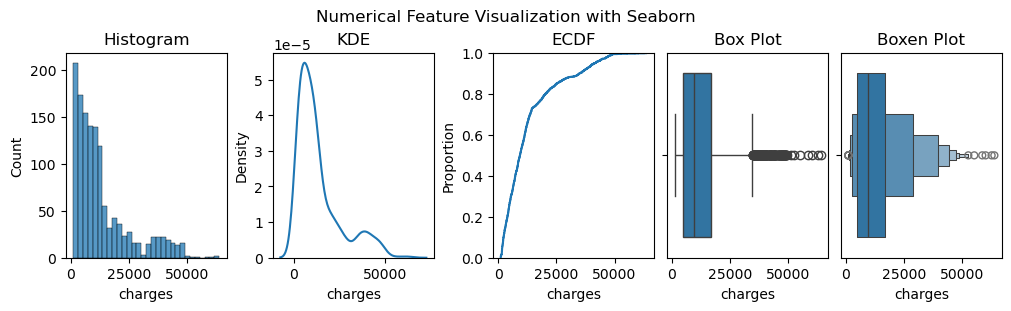

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='charges', ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df, x='charges', ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df, x='charges', ax=axs[2])

axs[3].set_title("Box Plot")
sns.boxplot(data=df, x='charges', ax=axs[3])

axs[4].set_title("Boxen Plot")
sns.boxenplot(data=df, x='charges', ax=axs[4])

plt.show()

<Axes: xlabel='sex', ylabel='count'>

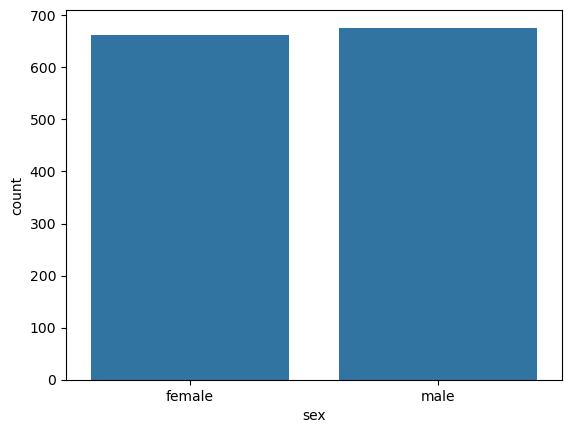

In [28]:
sns.countplot(data=df, x='sex')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='charges', ylabel='age'>

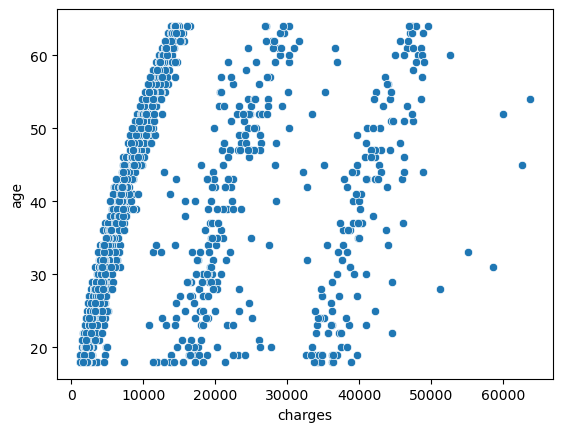

In [33]:
sns.scatterplot(data=df, x='charges', y='age')

<Axes: xlabel='age', ylabel='charges'>

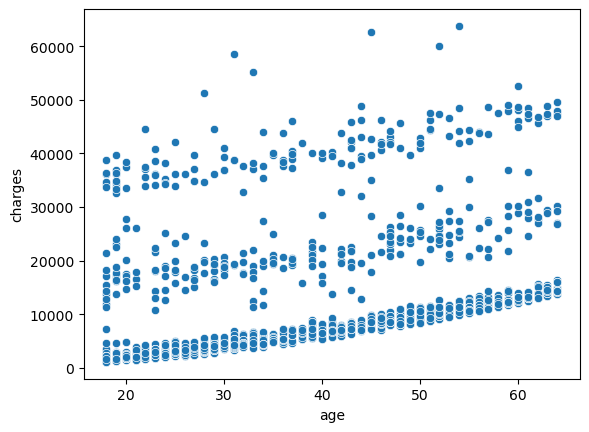

In [34]:
sns.scatterplot(data=df, x='age', y='charges')

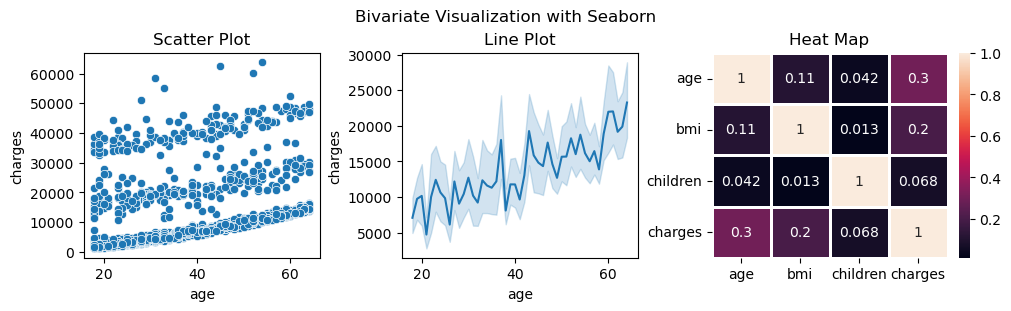

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df, x='age', y='charges', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df, x='age', y='charges', ax=axs[1])
axs[1].annotate("What ?", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.8, ax=axs[2])

plt.show()

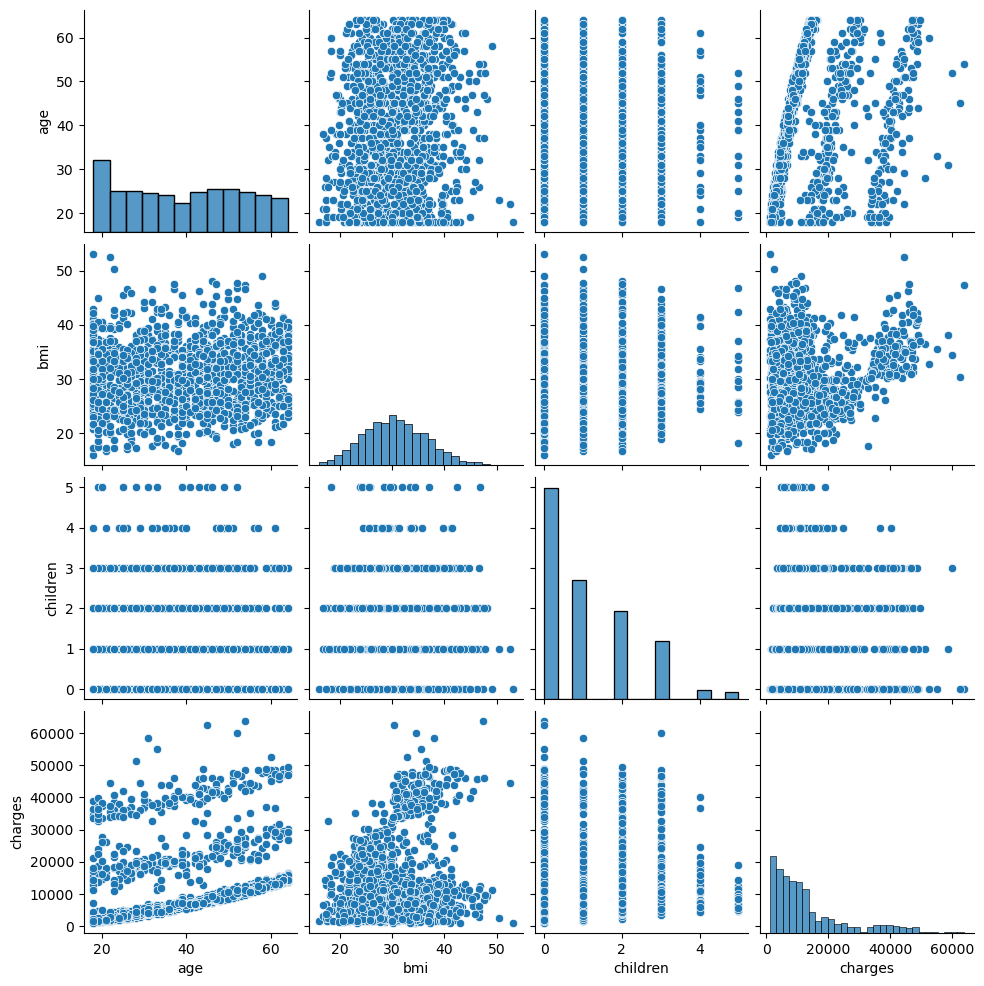

In [37]:
sns.pairplot(df)

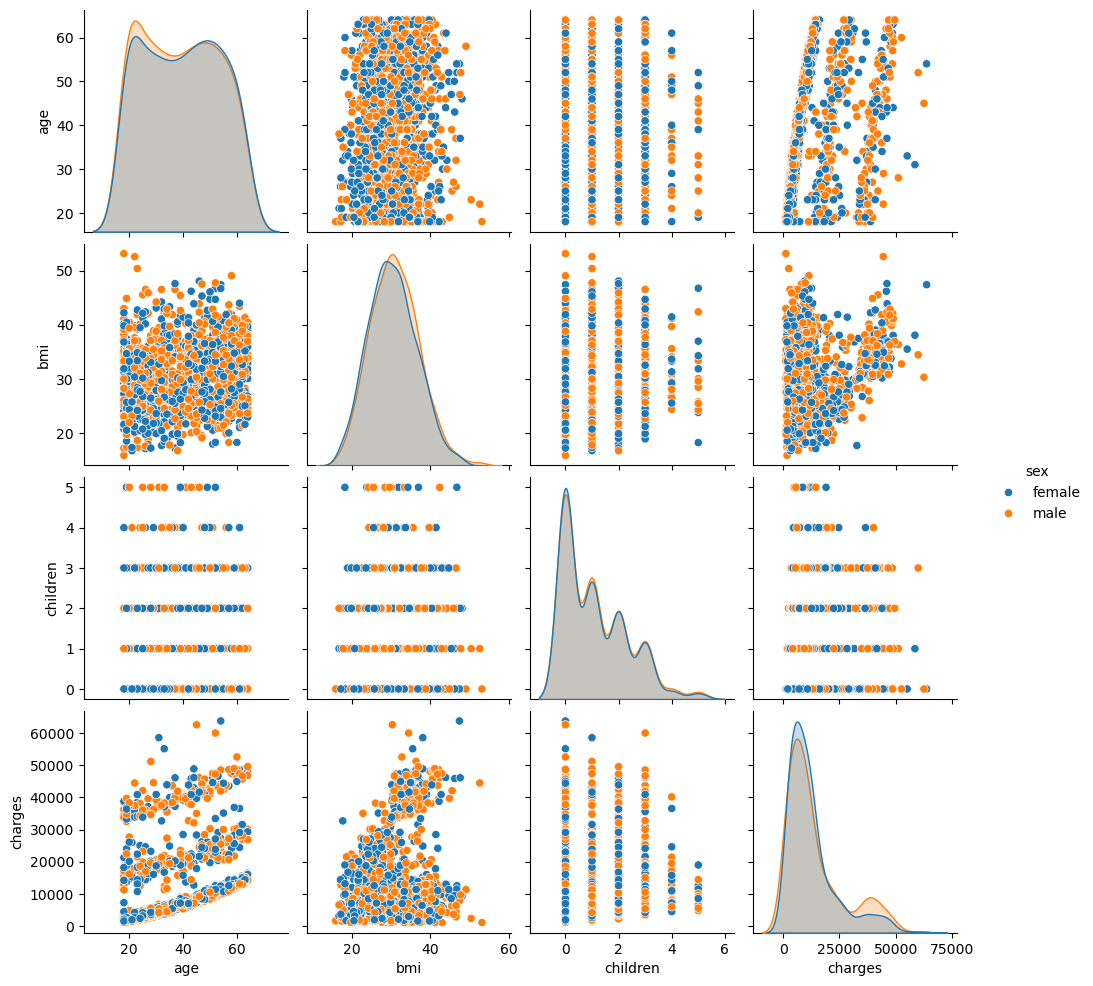

In [38]:
sns.pairplot(df, hue="sex")

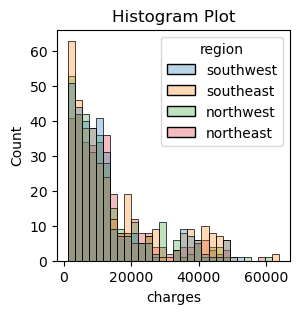

In [39]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Histogram Plot")
sns.histplot(data=df, x='charges', hue="region", alpha=0.3, ax=ax)

plt.show()

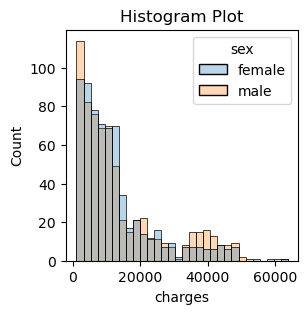

In [40]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Histogram Plot")
sns.histplot(data=df, x='charges', hue="sex", alpha=0.3, ax=ax)

plt.show()

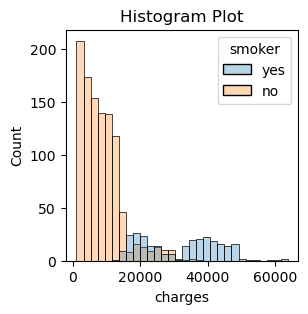

In [41]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Histogram Plot")
sns.histplot(data=df, x='charges', hue="smoker", alpha=0.3, ax=ax)

plt.show()

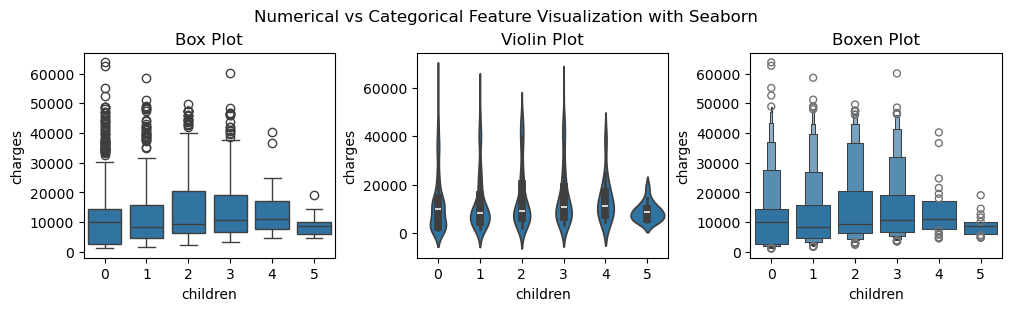

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df, x='children', y='charges', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df, x= 'children', y='charges', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df, x='children', y='charges', ax=axs[2])



plt.show()

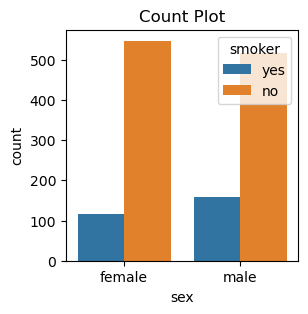

In [43]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title("Count Plot")
sns.countplot(data=df, x='sex', hue='smoker', ax=ax)

plt.show()

In [45]:
df1 = df[df["charges"] < 50000]

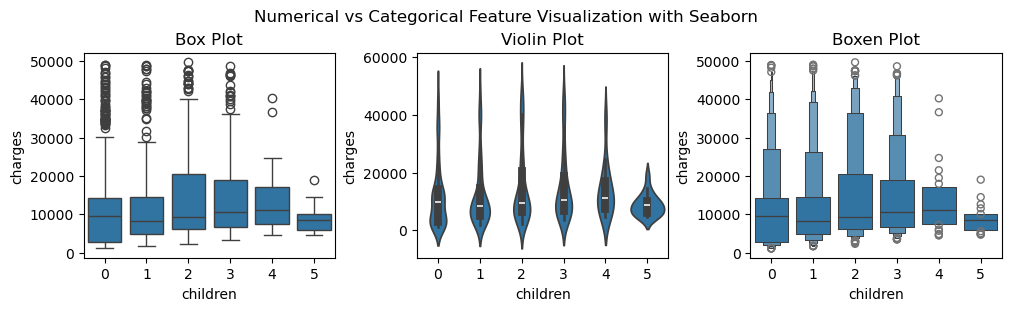

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df1, x='children', y='charges', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df1, x= 'children', y='charges', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df1, x='children', y='charges', ax=axs[2])



plt.show()

<Axes: xlabel='children', ylabel='charges'>

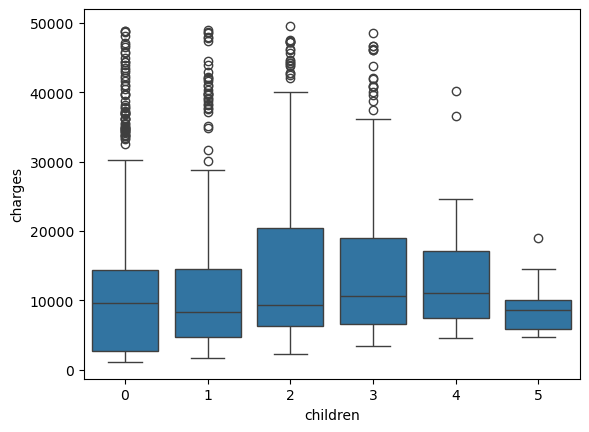

In [47]:
sns.boxplot(data=df1, x='children', y='charges')

<Axes: xlabel='sex', ylabel='charges'>

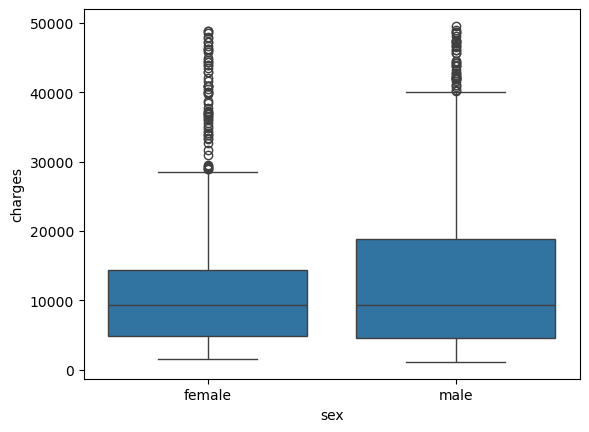

In [51]:
sns.boxplot(data=df1, x='sex', y='charges')

<Axes: xlabel='smoker', ylabel='charges'>

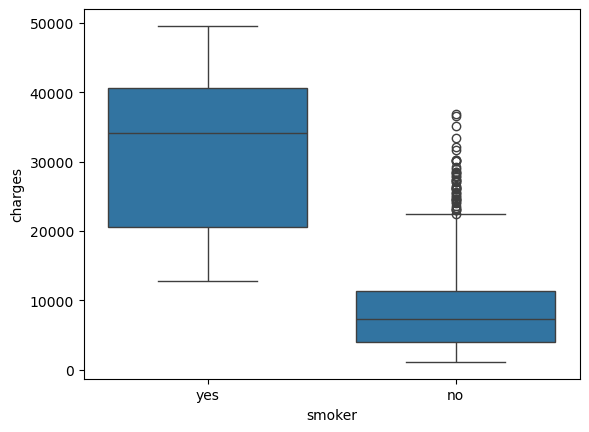

In [52]:
sns.boxplot(data=df1, x='smoker', y='charges')

<Axes: xlabel='age', ylabel='charges'>

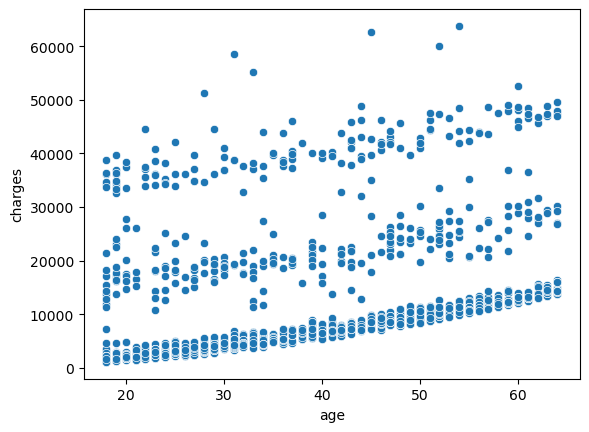

In [54]:
sns.scatterplot(data=df, x='age', y='charges', ax=axs[0])

<Axes: xlabel='age', ylabel='charges'>

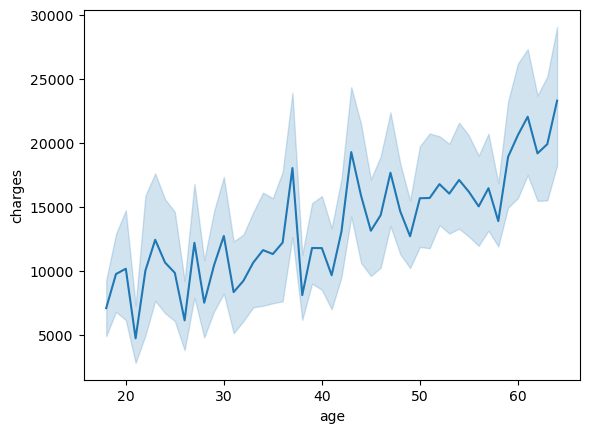

In [59]:
sns.lineplot(data=df, x='age', y='charges')

<Axes: xlabel='bmi', ylabel='charges'>

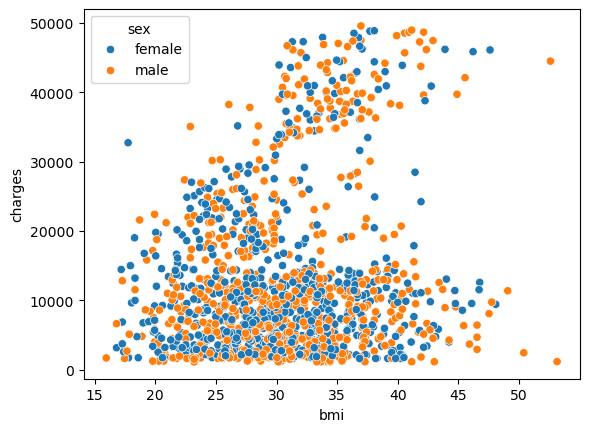

In [60]:
sns.scatterplot(data=df1, x='bmi', y='charges', hue="sex")

<Axes: xlabel='age', ylabel='charges'>

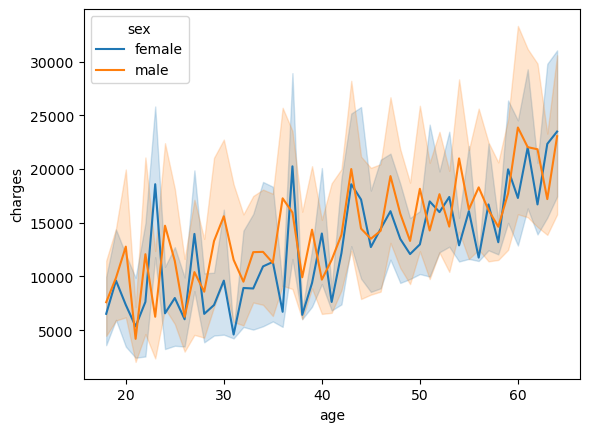

In [61]:
sns.lineplot(data=df1, x='age', y='charges', hue="sex")

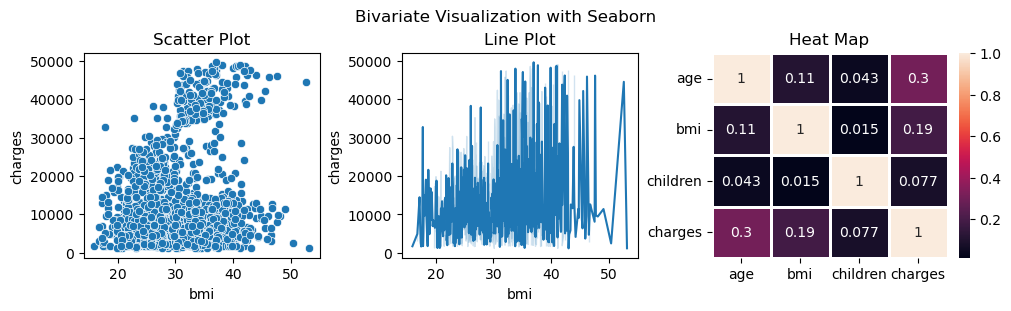

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df1, x='bmi', y='charges', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df1, x='bmi', y='charges', ax=axs[1])
axs[1].annotate("What ?", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df1.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.8, ax=axs[2])

plt.show()

<Axes: >

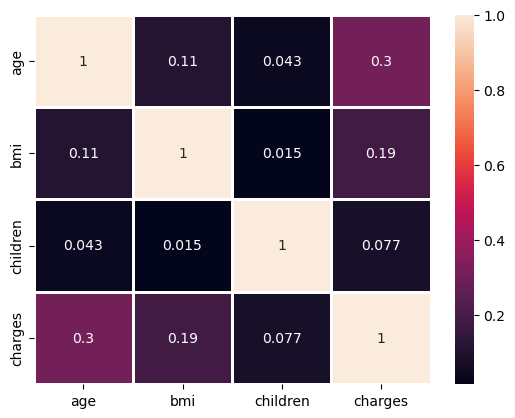

In [63]:
sns.heatmap(df1.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.8)

<Axes: xlabel='charges', ylabel='Count'>

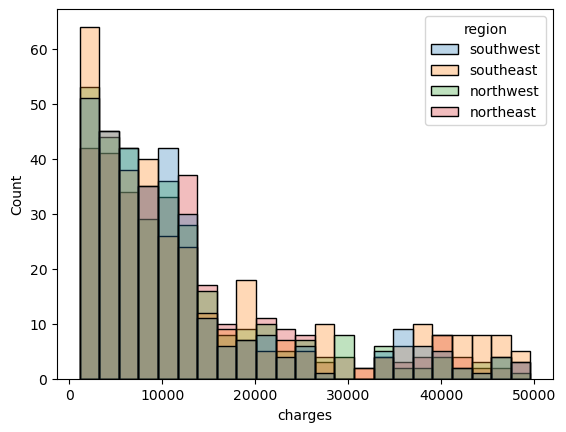

In [66]:
sns.histplot(data=df1, x='charges', hue="region", alpha=0.3)


<Axes: xlabel='region', ylabel='charges'>

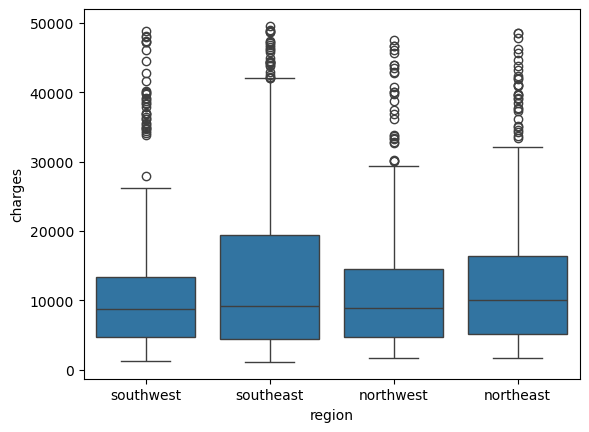

In [67]:
sns.boxplot(data=df1, x='region', y='charges')